In [1]:
import pandas as pd
import numpy as np

In [2]:
consDF = pd.read_parquet("Consumer.pqt")
consDF = consDF.drop(columns = ["credit_score"])
consDF = consDF.dropna()
acctDF = pd.read_parquet("Account.pqt")
trxnDF = pd.read_parquet("Transaction.pqt")
catmap = pd.read_csv("catmap.csv")

In [ ]:
consDF

,prism_consumer_id,evaluation_date,DQ_TARGET
0,0,2021-09-01,0.0
1,1,2021-07-01,0.0
2,2,2021-05-01,0.0
3,3,2021-03-01,0.0
4,4,2021-10-01,0.0
...,...,...,...
13995,13995,2022-01-22,0.0
13996,13996,2022-02-01,0.0
13997,13997,2021-12-24,0.0
13998,13998,2022-01-30,0.0


In [68]:
acctDF

,prism_consumer_id,prism_account_id,account_type,balance_date,balance
0,3023,0,SAVINGS,2021-08-31,90.57
1,3023,1,CHECKING,2021-08-31,225.95
2,4416,2,SAVINGS,2022-03-31,15157.17
3,4416,3,CHECKING,2022-03-31,66.42
4,4227,4,CHECKING,2021-07-31,7042.90
...,...,...,...,...,...
24461,11500,24461,CHECKING,2022-03-27,732.75
24462,11615,24462,SAVINGS,2022-03-30,5.00
24463,11615,24463,CHECKING,2022-03-30,1956.46
24464,12210,24464,CHECKING,2022-03-28,2701.51


In [4]:
positive_cases = consDF[consDF['DQ_TARGET'] == 1.0]
negative_cases = consDF[consDF['DQ_TARGET'] == 0.0]
pos_id_list = positive_cases['prism_consumer_id'].sample(n=20, random_state=42).tolist()
neg_id_list = negative_cases['prism_consumer_id'].sample(n=20, random_state=42).tolist()


In [8]:
pos_id_balance = acctDF[acctDF['prism_consumer_id'].isin(pos_id_list)].drop(columns = ["balance_date"])
neg_id_balance = acctDF[acctDF['prism_consumer_id'].isin(neg_id_list)].drop(columns = ["balance_date"])

In [9]:
pos_id_balance.describe()

,balance
count,24.000000
mean,947.966667
std,3196.787079
min,-1018.630000
25%,0.000000
50%,40.455000
75%,621.187500
max,15600.330000


In [13]:
pos_id_balance.groupby("prism_consumer_id").sum().describe()

,balance
count,18.000000
mean,1263.955556
std,3927.645341
min,-1693.700000
25%,6.432500
50%,130.770000
75%,716.892500
max,16658.280000


In [10]:
neg_id_balance.describe()

,balance
count,34.000000
mean,2355.328824
std,6937.170444
min,-405.220000
25%,105.942500
50%,536.685000
75%,1479.510000
max,40018.420000


In [14]:
neg_id_balance.groupby("prism_consumer_id").sum().describe()

,balance
count,18.000000
mean,4448.954444
std,10257.497021
min,-405.220000
25%,231.072500
50%,957.320000
75%,3123.935000
max,42744.170000


In [ ]:
trxnDF[trxnDF['prism_consumer_id'].isin(pos_id_list)]['amount'].describe()

count     5652.000000
mean       128.051322
std        843.938334
min          0.000000
25%         10.990000
50%         26.000000
75%         80.000000
max      50584.620000
Name: amount, dtype: float64

In [24]:
trxnDF[trxnDF['prism_consumer_id'].isin(pos_id_list)]['category'].value_counts(normalize= True)

category
14    0.151628
1     0.145258
16    0.130042
17    0.078733
4     0.076787
40    0.044409
0     0.044232
35    0.042640
19    0.036801
3     0.036093
12    0.031847
20    0.029901
18    0.027247
2     0.013800
26    0.012562
22    0.012031
23    0.011146
6     0.010262
31    0.009731
25    0.006546
27    0.006016
21    0.005662
13    0.005485
37    0.005485
24    0.005131
44    0.004246
36    0.003892
45    0.003715
39    0.002477
7     0.002123
34    0.000708
30    0.000708
29    0.000531
42    0.000531
28    0.000531
38    0.000354
11    0.000177
43    0.000177
33    0.000177
46    0.000177
Name: proportion, dtype: float64

In [ ]:
trxnDF

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date,category_name
0,3023,0,4,0.05,CREDIT,2021-04-16,MISCELLANEOUS
1,3023,1,12,481.56,CREDIT,2021-04-30,LOAN
2,3023,2,4,0.05,CREDIT,2021-05-16,MISCELLANEOUS
3,3023,3,4,0.07,CREDIT,2021-06-16,MISCELLANEOUS
4,3023,4,4,0.06,CREDIT,2021-07-16,MISCELLANEOUS
...,...,...,...,...,...,...,...
6407316,10533,6405304,31,4.96,DEBIT,2022-03-11,BILLS_UTILITIES
6407317,10533,6405305,12,63.48,DEBIT,2022-03-30,LOAN
6407318,10533,6405306,12,53.99,DEBIT,2022-03-30,LOAN
6407319,10533,6405307,12,175.98,DEBIT,2022-03-31,LOAN


In [45]:
trxnDF['credit_or_debit'].value_counts()

credit_or_debit
DEBIT     5302358
CREDIT    1104963
Name: count, dtype: int64

In [18]:
trxnDF[trxnDF['prism_consumer_id'].isin(neg_id_list)]['amount'].describe()

count      6623.000000
mean        211.979722
std        2377.367203
min           0.010000
25%           7.915000
50%          23.750000
75%          84.125000
max      127070.420000
Name: amount, dtype: float64

In [23]:
trxnDF[trxnDF['prism_consumer_id'].isin(neg_id_list)]['category'].value_counts(normalize= True)

category
14    0.149177
1     0.141628
0     0.120640
16    0.100257
4     0.098898
17    0.073985
18    0.058584
20    0.033822
3     0.030802
12    0.020685
40    0.018723
2     0.017817
19    0.016458
26    0.011173
27    0.010569
24    0.010116
45    0.009814
6     0.009059
13    0.007700
31    0.007398
7     0.007247
35    0.006644
22    0.006644
21    0.004530
37    0.003926
36    0.002869
25    0.002718
23    0.002416
34    0.002265
49    0.002114
39    0.002114
11    0.001963
8     0.001661
28    0.001359
29    0.001359
32    0.000604
41    0.000604
48    0.000604
30    0.000453
42    0.000302
9     0.000151
33    0.000151
Name: proportion, dtype: float64

In [29]:
cat_dict = dict(zip(catmap['category_id'], catmap['category']))
trxnDF['category_name'] = trxnDF['category'].map(cat_dict)

pos_dist = trxnDF[trxnDF['prism_consumer_id'].isin(pos_id_list)]['category_name'].value_counts(normalize=True)
neg_dist = trxnDF[trxnDF['prism_consumer_id'].isin(neg_id_list)]['category_name'].value_counts(normalize=True)

comparison = pd.DataFrame({'Positive_Group': pos_dist, 'Negative_Group': neg_dist}).fillna(0)

comparison['abs_diff'] = (comparison['Positive_Group'] - comparison['Negative_Group']).abs()

print(comparison.sort_values(by='abs_diff', ascending=False))

                       Positive_Group  Negative_Group  abs_diff
category_name                                                  
SELF_TRANSFER                0.044232        0.120640  0.076408
BNPL                         0.042640        0.006644  0.035996
GROCERIES                    0.027247        0.058584  0.031337
GENERAL_MERCHANDISE          0.130042        0.100257  0.029786
TRANSPORATION                0.044409        0.018723  0.025686
MISCELLANEOUS                0.076787        0.098898  0.022111
ATM_CASH                     0.036801        0.016458  0.020343
LOAN                         0.031847        0.020685  0.011162
ACCOUNT_FEES                 0.011146        0.002416  0.008731
INVESTMENT                   0.003715        0.009814  0.006099
ESSENTIAL_SERVICES           0.012031        0.006644  0.005388
PAYCHECK                     0.036093        0.030802  0.005292
INVESTMENT_INCOME            0.002123        0.007247  0.005124
HOME_IMPROVEMENT             0.005131   

In [30]:
catmap[catmap['category'] == 'SELF_TRANSFER']

,category_id,category
0,0,SELF_TRANSFER


In [28]:

bnpl_users = trxnDF[trxnDF['category'] == 35]['prism_consumer_id'].unique()

pos_bnpl_count = pd.Series(pos_id_list).isin(bnpl_users).sum()

neg_bnpl_count = pd.Series(neg_id_list).isin(bnpl_users).sum()

print(f"Positive Sample: {pos_bnpl_count} out of {len(pos_id_list)} used BNPL ({pos_bnpl_count/len(pos_id_list):.1%})")
print(f"Negative Sample: {neg_bnpl_count} out of {len(neg_id_list)} used BNPL ({neg_bnpl_count/len(neg_id_list):.1%})")

Positive Sample: 7 out of 20 used BNPL (35.0%)
Negative Sample: 4 out of 20 used BNPL (20.0%)


In [33]:
trxnDF[trxnDF['category'] == 0]['prism_consumer_id'].value_counts()

prism_consumer_id
11933    2805
14245    1955
14384    1836
10078    1672
11770    1544
         ... 
6807        1
10782       1
6735        1
14519       1
9182        1
Name: count, Length: 11282, dtype: int64

In [37]:

self_transfers = trxnDF[trxnDF['category'] == 0]

def get_transfer_stats(sample_ids):
    sample_transfers = self_transfers[self_transfers['prism_consumer_id'].isin(sample_ids)]
    counts = sample_transfers['prism_consumer_id'].value_counts()
    all_counts = counts.reindex(sample_ids, fill_value=0)
    return all_counts

pos_transfer_counts = get_transfer_stats(pos_id_list)
neg_transfer_counts = get_transfer_stats(neg_id_list)

print("--- Positive Group Self-Transfer Stats ---")
print(f"median transfers per user: {pos_transfer_counts.median():.2f}")
print(f"Users with at least five transfer: {(pos_transfer_counts > 5).sum()} / {len(pos_id_list)}")
print("\nIndividual Counts (Top 5):")
print(pos_transfer_counts.head(5))

print("\n" + "="*40 + "\n")

print("--- Negative Group Self-Transfer Stats ---")
print(f"median transfers per user: {neg_transfer_counts.median():.2f}")
print(f"Users with at least five transfer: {(neg_transfer_counts > 5).sum()} / {len(neg_id_list)}")
print("\nIndividual Counts (Top 5):")
print(neg_transfer_counts.head(5))

--- Positive Group Self-Transfer Stats ---
median transfers per user: 1.00
Users with at least five transfer: 6 / 20

Individual Counts (Top 5):
prism_consumer_id
12635     0
8148      0
8453     28
7462     12
6529     16
Name: count, dtype: int64


--- Negative Group Self-Transfer Stats ---
median transfers per user: 7.50
Users with at least five transfer: 11 / 20

Individual Counts (Top 5):
prism_consumer_id
110       0
6906     29
2915     32
11622    90
10938     0
Name: count, dtype: int64


In [42]:
# Create a combined list of your sampled IDs and label them for clarity
sampled_ids = pos_id_list + neg_id_list
labels = ['Positive'] * len(pos_id_list) + ['Negative'] * len(neg_id_list)
consDF['high_st_no_bnpl'] = (
    (consDF['st_count'] > 5) & 
    (consDF['bnpl_count'] == 0)
).astype(int)
sample_results = consDF[consDF['prism_consumer_id'].isin(sampled_ids)].copy()

sample_results['group'] = sample_results['prism_consumer_id'].map(dict(zip(sampled_ids, labels)))

display_cols = ['group', 'st_count', 'bnpl_count', 'high_st_no_bnpl', 'DQ_TARGET']
print(sample_results[display_cols].sort_values(by=['group', 'high_st_no_bnpl'], ascending=False))

print("\n--- Feature Presence in Samples ---")
print(sample_results.groupby('group')['high_st_no_bnpl'].value_counts().unstack().fillna(0))

          group  st_count  bnpl_count  high_st_no_bnpl  DQ_TARGET
3011   Positive      10.0         0.0                1        1.0
6529   Positive      16.0         0.0                1        1.0
7462   Positive      12.0         0.0                1        1.0
8453   Positive      28.0         0.0                1        1.0
5080   Positive       0.0        13.0                0        1.0
5952   Positive       1.0        67.0                0        1.0
6198   Positive       0.0        65.0                0        1.0
6332   Positive       0.0         0.0                0        1.0
6550   Positive     145.0        16.0                0        1.0
7121   Positive       0.0         0.0                0        1.0
7526   Positive       3.0         0.0                0        1.0
8016   Positive      30.0        13.0                0        1.0
8148   Positive       0.0         0.0                0        1.0
8263   Positive       0.0         0.0                0        1.0
8274   Pos

In [50]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq

# 1. Preprocessing: Date conversion and category selection
trxnDF['posted_date'] = pd.to_datetime(trxnDF['posted_date'])
target_cats = {12: 'Loan', 31: 'Bills/Utilities', 32: 'Mortgage', 36: 'Auto Loan'}

def analyze_monthly_signal(user_id, cat_id, df):
    # Filter for user and category
    subset = df[(df['prism_consumer_id'] == user_id) & (df['category'] == cat_id)]
    if len(subset) < 3: return 0.0  # Not enough data for a pattern
    
    # Create daily binary time series
    start, end = df['posted_date'].min(), df['posted_date'].max()
    days = (end - start).days + 1
    signal = np.zeros(days)
    
    # Fill signal with transaction flags
    for date in subset['posted_date']:
        idx = (date - start).days
        if idx < days: signal[idx] = 1.0
        
    # Apply Hanning Window to reduce noise at edges
    windowed_signal = signal * np.hanning(len(signal))
    
    # Perform FFT
    N = len(windowed_signal)
    yf = np.abs(fft(windowed_signal))
    xf = fftfreq(N, 1)  # frequency in cycles per day
    
    # Extract only positive frequencies
    pos_mask = xf > 0
    xf, yf = xf[pos_mask], yf[pos_mask]
    
    # Find the peak frequency
    peak_freq = xf[np.argmax(yf)]
    peak_period = 1 / peak_freq if peak_freq > 0 else 0
    
    # Return peak period (should be ~30 for monthly)
    return peak_period

# 2. Run analysis on your samples
all_samples = pos_id_list + neg_id_list
results = []

for uid in all_samples:
    user_row = {'id': uid, 'group': 'Positive' if uid in pos_id_list else 'Negative'}
    for cid, name in target_cats.items():
        period = analyze_monthly_signal(uid, cid, trxnDF)
        # Check if period falls within standard monthly window (25-35 days)
        user_row[name] = 1 if 25 <= period <= 35 else 0
    results.append(user_row)

# 3. Consolidate and View Results
analysis_df = pd.DataFrame(results)
print("--- Monthly Payment Regularity (1 = Regular, 0 = Irregular) ---")
print(analysis_df.groupby('group')[list(target_cats.values())].mean())

--- Monthly Payment Regularity (1 = Regular, 0 = Irregular) ---
          Loan  Bills/Utilities  Mortgage  Auto Loan
group                                               
Negative   0.0              0.0       0.0       0.05
Positive   0.0              0.0       0.0       0.00


In [52]:
sampled_ids = pos_id_list + neg_id_list
trxnDF[trxnDF['prism_consumer_id'].isin(sampled_ids)]

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date,category_name
151846,2030,151782,4,1.00,CREDIT,2020-08-28,MISCELLANEOUS
151847,2030,151783,4,0.78,CREDIT,2020-09-25,MISCELLANEOUS
151848,2030,151784,4,0.63,CREDIT,2020-10-23,MISCELLANEOUS
151849,2030,151785,4,0.48,CREDIT,2020-11-27,MISCELLANEOUS
151850,2030,151786,0,3000.00,CREDIT,2020-12-03,SELF_TRANSFER
...,...,...,...,...,...,...,...
5866932,13965,5864920,16,10.28,DEBIT,2022-02-02,GENERAL_MERCHANDISE
5866933,13965,5864921,1,2.00,DEBIT,2022-02-07,EXTERNAL_TRANSFER
5866934,13965,5864922,37,72.13,DEBIT,2022-02-08,BANKING_CATCH_ALL
5866935,13965,5864923,37,50.00,DEBIT,2022-02-08,BANKING_CATCH_ALL


In [64]:
import numpy as np
import pandas as pd

def add_fourier_features(df, date_col):
    """
    Adds Fourier transformed features for Weekly, Monthly, and Yearly patterns.
    
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        date_col (str): The name of the datetime column.
        
    Returns:
        pd.DataFrame: Dataframe with new Fourier features added.
    """
    
    # Ensure the column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])
    
    # 1. Weekly Pattern (Period = 7 days)
    # 0 = Monday, 6 = Sunday
    df['day_of_week'] = df[date_col].dt.dayofweek
    df['sin_weekly'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['cos_weekly'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # 2. Monthly Pattern (Period = ~30.44 days or just mapping day of month)
    # Using 'days_in_month' handles leap years and variable month lengths better
    df['day_of_month'] = df[date_col].dt.day
    df['days_in_month'] = df[date_col].dt.days_in_month
    df['sin_monthly'] = np.sin(2 * np.pi * df['day_of_month'] / df['days_in_month'])
    df['cos_monthly'] = np.cos(2 * np.pi * df['day_of_month'] / df['days_in_month'])


    # Drop intermediate raw columns if you only want the transforms
    df.drop(['day_of_week', 'day_of_month', 'days_in_month'], axis=1, inplace=True)
    
    return df

# --- Usage Example ---
sampled_ids = pos_id_list + neg_id_list
df = trxnDF[trxnDF['prism_consumer_id'].isin(sampled_ids)]

df_transformed = add_fourier_features(df, 'posted_date')
print(df_transformed.head())

       prism_consumer_id prism_transaction_id  category   amount  \
151846              2030               151782         4     1.00   
151847              2030               151783         4     0.78   
151848              2030               151784         4     0.63   
151849              2030               151785         4     0.48   
151850              2030               151786         0  3000.00   

       credit_or_debit posted_date  category_name  sin_weekly  cos_weekly  \
151846          CREDIT  2020-08-28  MISCELLANEOUS   -0.433884   -0.900969   
151847          CREDIT  2020-09-25  MISCELLANEOUS   -0.433884   -0.900969   
151848          CREDIT  2020-10-23  MISCELLANEOUS   -0.433884   -0.900969   
151849          CREDIT  2020-11-27  MISCELLANEOUS   -0.433884   -0.900969   
151850          CREDIT  2020-12-03  SELF_TRANSFER    0.433884   -0.900969   

        sin_monthly  cos_monthly  
151846    -0.571268     0.820763  
151847    -0.866025     0.500000  
151848    -0.998717    

/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_16050/3741203017.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])
/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_16050/3741203017.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df[date_col].dt.dayofweek
/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_16050/3741203017.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Full Dataset Ready: 5,136,834 transactions.
Total Unique Users: 11,601
Class Balance: 7.53% of transactions belong to DQ users
ROC AUC Score: 0.5452


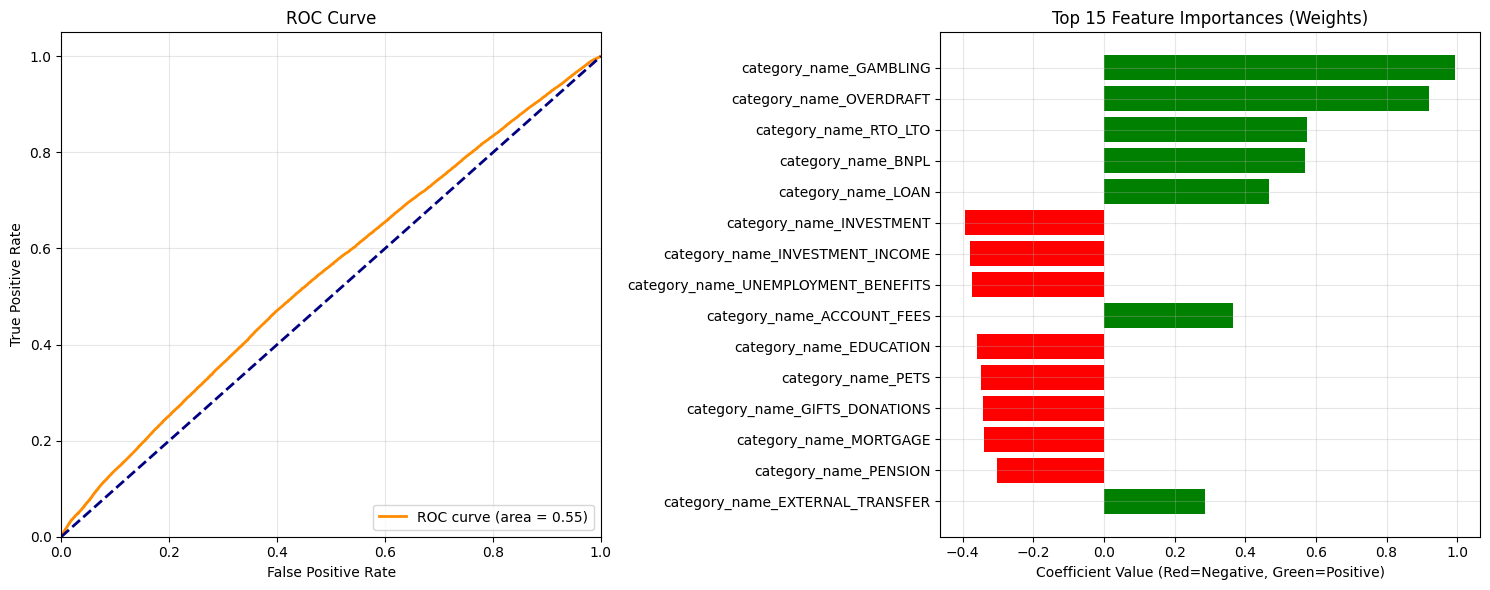

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

# --- 1. Setup & Split (Same as before) ---
labels_df = consDF[['prism_consumer_id', 'DQ_TARGET']]
df = trxnDF.merge(labels_df[['prism_consumer_id', 'DQ_TARGET']], on='prism_consumer_id', how='inner')

print(f"Full Dataset Ready: {len(df):,} transactions.")
print(f"Total Unique Users: {df['prism_consumer_id'].nunique():,}")
print(f"Class Balance: {df['DQ_TARGET'].mean():.2%} of transactions belong to DQ users")

# --- 3. Proceed with Feature Engineering ---
# Now you can run the Fourier transform function on 'df'
df_transformed = add_fourier_features(df, 'posted_date')
numeric_features = [
    'amount', 
    'sin_weekly', 'cos_weekly', 
    'sin_monthly', 'cos_monthly'
]
categorical_features = ['category_name', 'credit_or_debit']

# Split by ID to prevent leakage
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df_transformed, groups=df_transformed['prism_consumer_id']))

X = df_transformed[numeric_features + categorical_features]
y = df_transformed['DQ_TARGET']

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# --- 2. Pipeline Training ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

clf.fit(X_train, y_train)

# --- 3. Calculate ROC AUC ---
# We need probabilities, not just class labels, for ROC AUC
y_prob = clf.predict_proba(X_test)[:, 1] # Probability of class 1 (DQ)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC AUC Score: {roc_auc:.4f}")

# --- 4. Visualization (One Window) ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot A: The ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")
axes[0].grid(alpha=0.3)

# Plot B: Top Feature Coefficients (To see which patterns drive the model)
# Extract feature names & coefficients
ohe_names = clf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_names = numeric_features + list(ohe_names)
coeffs = clf.named_steps['classifier'].coef_[0]

# Create DataFrame and sort
coef_df = pd.DataFrame({'Feature': all_names, 'Coefficient': coeffs})
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coef', ascending=True).tail(15) # Top 15

# Bar Plot
axes[1].barh(top_features['Feature'], top_features['Coefficient'], color=np.where(top_features['Coefficient'] > 0, 'green', 'red'))
axes[1].set_title('Top 15 Feature Importances (Weights)')
axes[1].set_xlabel('Coefficient Value (Red=Negative, Green=Positive)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Generating interactions for 31 categories x 4 time patterns...
Concatenating features...
Total Features: 160
Training model...
Interaction Model ROC AUC: 0.5446


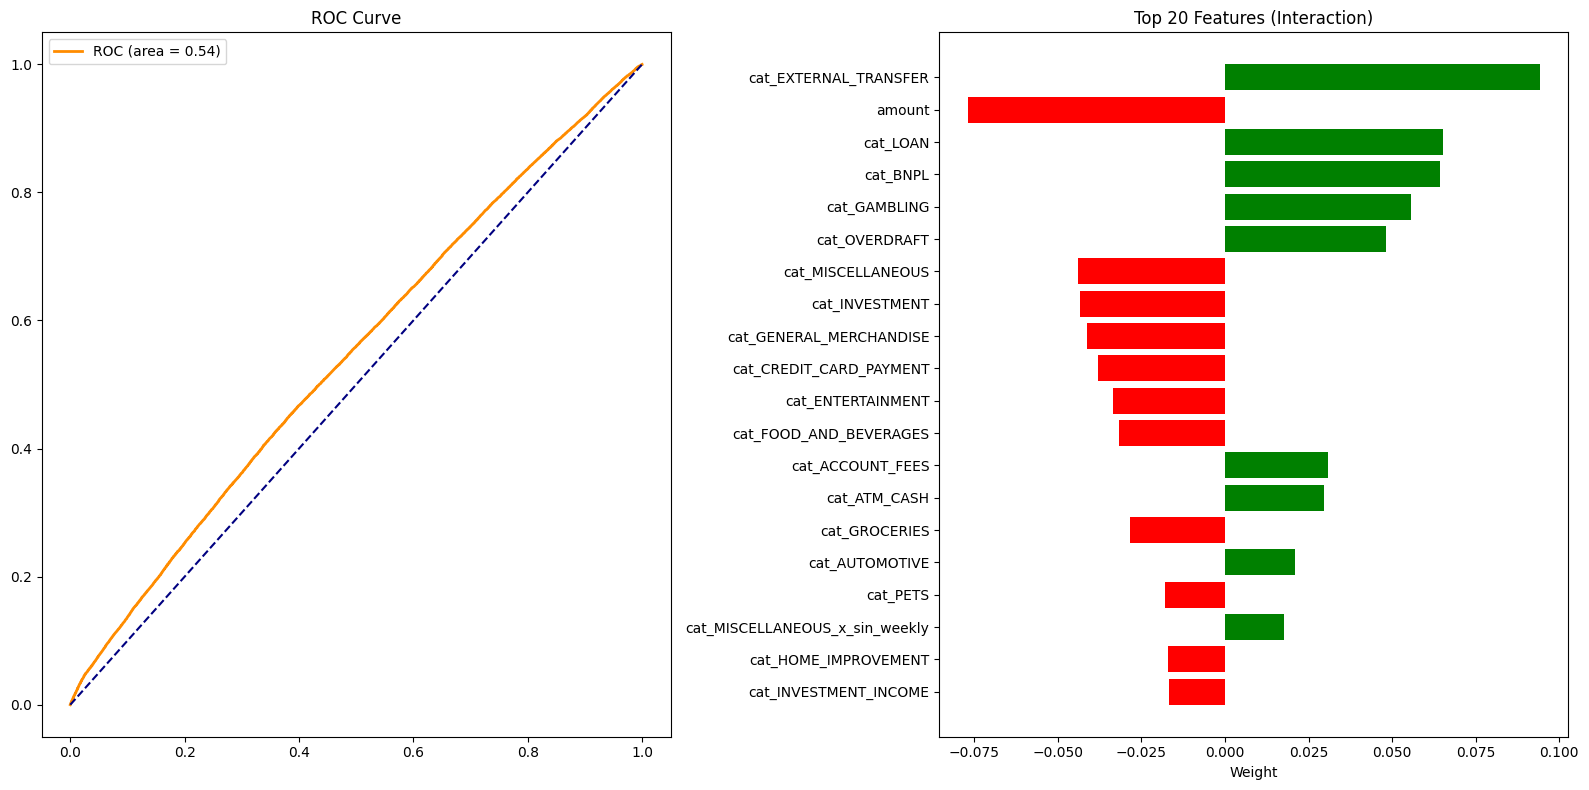

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# --- 1. Load & Prepare Data ---
# Ensure you are merging correctly as you did before
labels_df = consDF[['prism_consumer_id', 'DQ_TARGET']]
df = trxnDF.merge(labels_df, on='prism_consumer_id', how='inner')

# Apply Fourier Features
df_transformed = add_fourier_features(df, 'posted_date')

# --- 2. Smart One-Hot Encoding ---
# We limit to Top 30 categories to prevent memory explosion
top_categories = df_transformed['category_name'].value_counts().nlargest(30).index
df_transformed['category_clean'] = df_transformed['category_name'].where(
    df_transformed['category_name'].isin(top_categories), other='OTHER'
)

# Create dummies
cat_dummies = pd.get_dummies(df_transformed['category_clean'], prefix='cat', dtype=float)

# --- 3. Vectorized Interaction Terms (The Fix) ---
time_features = ['sin_weekly', 'cos_weekly', 'sin_monthly', 'cos_monthly']
cat_features = cat_dummies.columns.tolist()

print(f"Generating interactions for {len(cat_features)} categories x {len(time_features)} time patterns...")

# optimization: Calculate all interactions and store in a list of DataFrames or Series
interaction_frames = []

for time_col in time_features:
    # Multiply the time column (Series) by the entire dataframe of categories (Matrix)
    # This vectorizes the operation: (N rows x C cats) * (N rows x 1 time)
    inter_df = cat_dummies.multiply(df_transformed[time_col], axis=0)
    
    # Rename columns to denote interaction
    inter_df.columns = [f"{col}_x_{time_col}" for col in inter_df.columns]
    
    # Append to list
    interaction_frames.append(inter_df)

# Concatenate EVERYTHING at once to avoid fragmentation
print("Concatenating features...")
df_interactions = pd.concat(interaction_frames, axis=1)
df_final = pd.concat([df_transformed, cat_dummies, df_interactions], axis=1)

# --- 4. Define Final Feature Set ---
interaction_cols = df_interactions.columns.tolist()
features_to_use = ['amount'] + time_features + cat_features + interaction_cols

print(f"Total Features: {len(features_to_use)}")

# --- 5. Split & Train ---
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df_final, groups=df_final['prism_consumer_id']))

X = df_final[features_to_use]
y = df_final['DQ_TARGET']

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# --- 6. Pipeline ---
# Note: n_jobs is technically deprecated in the init for some versions, 
# but mostly harmless. Removed to be safe.
clf = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression(random_state=42, 
                                      max_iter=1000, 
                                      class_weight='balanced', 
                                      solver='saga')) 
])

print("Training model...")
clf.fit(X_train, y_train)

# --- 7. Evaluate ---
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Interaction Model ROC AUC: {roc_auc:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0].set_title('ROC Curve')
axes[0].legend()

# Feature Importance
coeffs = clf.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': features_to_use, 'Coefficient': coeffs})
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coef', ascending=True).tail(20)

colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
axes[1].barh(top_features['Feature'], top_features['Coefficient'], color=colors)
axes[1].set_title('Top 20 Features (Interaction)')
axes[1].set_xlabel('Weight')

plt.tight_layout()
plt.show()

Total Users: 11,601
Users with > 1 Year of Data: 11 (0.1%)


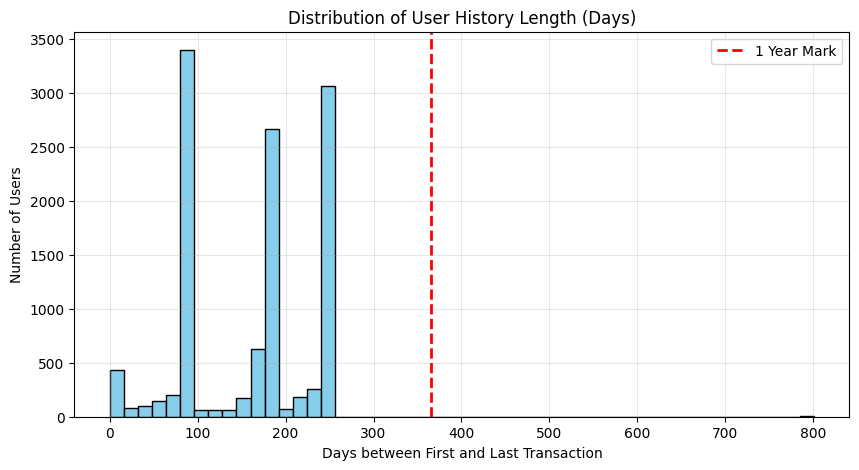

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'posted_date' is datetime
df['posted_date'] = pd.to_datetime(df['posted_date'])

# 1. Calculate the timespan for each user
user_spans = df.groupby('prism_consumer_id')['posted_date'].agg(['min', 'max'])
user_spans['days_active'] = (user_spans['max'] - user_spans['min']).dt.days

# 2. Count Long-Term vs. Short-Term Users
total_users = len(user_spans)
users_over_1yr = len(user_spans[user_spans['days_active'] >= 365])
pct_over_1yr = (users_over_1yr / total_users) * 100

print(f"Total Users: {total_users:,}")
print(f"Users with > 1 Year of Data: {users_over_1yr:,} ({pct_over_1yr:.1f}%)")

# 3. Visualize the Distribution
plt.figure(figsize=(10, 5))
plt.hist(user_spans['days_active'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(365, color='red', linestyle='--', linewidth=2, label='1 Year Mark')
plt.title('Distribution of User History Length (Days)')
plt.xlabel('Days between First and Last Transaction')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Starting Aggregation on 5,136,834 transactions...
Grouping by User... (This creates the 'Digital Fingerprint')


/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_16050/3720411269.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_user.reset_index(inplace=True)
/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_16050/3720411269.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_user['target'] = df_user['prism_consumer_id'].map(user_target_map['DQ_TARGET'])


User Profiles Ready: (11601, 108) (One row per user)
Training User-Level Model...

>>> USER-LEVEL ROC AUC SCORE: 0.7367 <<<


/Users/kylechoi/Desktop/Desktop - kyle의 MacBook Pro/DSC180B/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


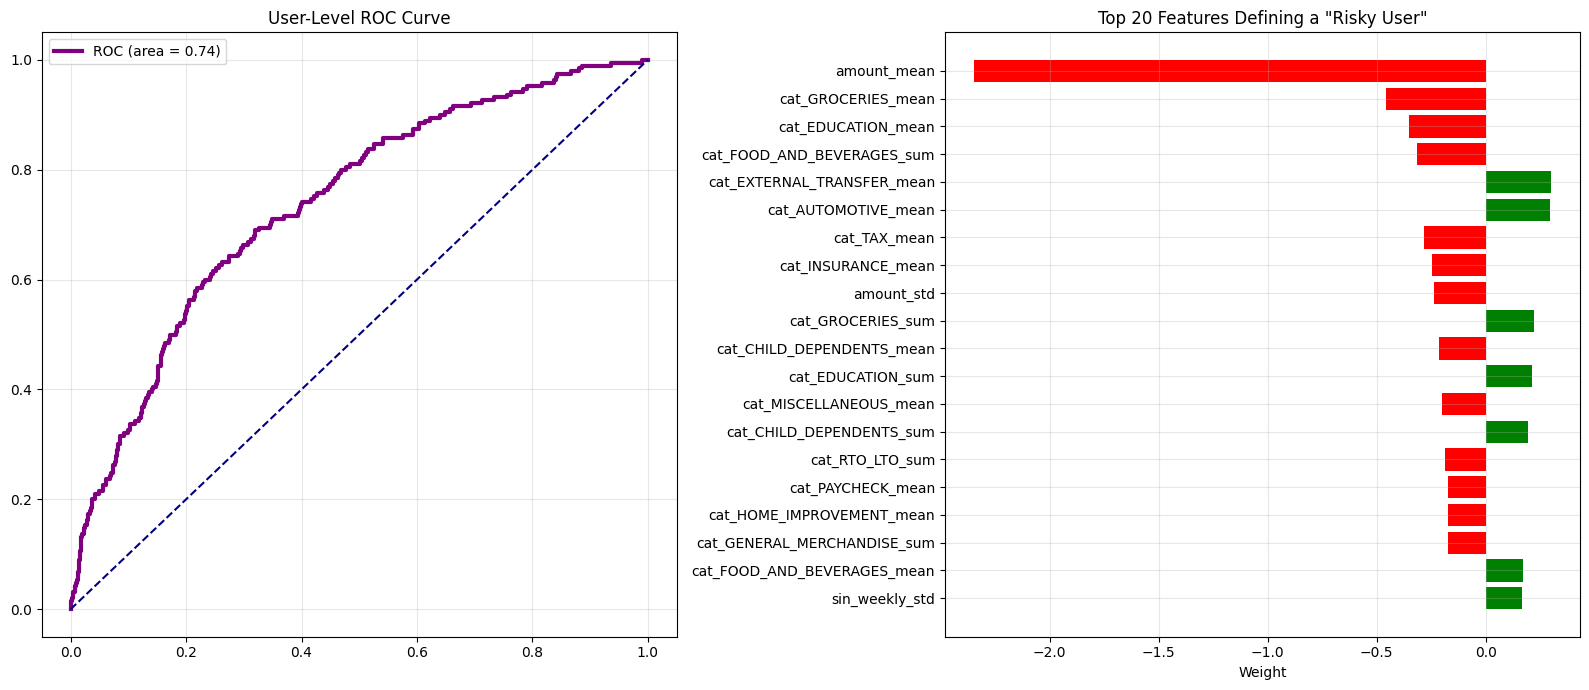

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# ==========================================
# 1. SETUP (Assuming 'df' is your merged data)
# ==========================================
# If you need to reload:
labels_df = consDF[['prism_consumer_id', 'DQ_TARGET']]
df = trxnDF.merge(labels_df, on='prism_consumer_id', how='inner')
df = add_fourier_features(df, 'posted_date')

print(f"Starting Aggregation on {len(df):,} transactions...")

# ==========================================
# 2. CREATE USER PROFILES (AGGREGATION)
# ==========================================

# A. One-Hot Encode Categories first (to count them per user)
cat_dummies = pd.get_dummies(df['category_name'], prefix='cat')
df_encoded = pd.concat([df, cat_dummies], axis=1)

# B. Define Aggregation Dictionary
# This tells pandas how to summarize each column for a single user
agg_dict = {
    'amount': ['mean', 'std', 'sum', 'count'],  # Spending power & volume
    
    # Fourier Means = "When do they usually spend?"
    # Fourier Stds = "How consistent is their schedule?" (Low std = Regular habits)
    'sin_weekly': ['mean', 'std'],
    'cos_weekly': ['mean', 'std'],
    'sin_monthly': ['mean', 'std'],
    'cos_monthly': ['mean', 'std']
}

# Add 'sum' (count) for every category column
for col in cat_dummies.columns:
    agg_dict[col] = ['sum', 'mean'] # Sum = Total transactions, Mean = % of their transactions

# C. Perform the GroupBy (The Heavy Lifting)
print("Grouping by User... (This creates the 'Digital Fingerprint')")
df_user = df_encoded.groupby('prism_consumer_id').agg(agg_dict)

# D. Flatten Columns (e.g., ('amount', 'mean') -> 'amount_mean')
df_user.columns = [f"{col[0]}_{col[1]}" for col in df_user.columns]
df_user.reset_index(inplace=True)

# E. Re-attach Target (DQ)
# Since 'prism_consumer_id' is unique now, we map the label back
user_target_map = df[['prism_consumer_id', 'DQ_TARGET']].drop_duplicates().set_index('prism_consumer_id')
df_user['target'] = df_user['prism_consumer_id'].map(user_target_map['DQ_TARGET'])

# F. Handle Missing Values (e.g., std dev is NaN if only 1 transaction)
df_user.fillna(0, inplace=True)

print(f"User Profiles Ready: {df_user.shape} (One row per user)")

# ==========================================
# 3. TRAIN USER-LEVEL MODEL
# ==========================================
# Standard Train/Test Split (No GroupShuffleSplit needed anymore, rows are unique users)
X = df_user.drop(['prism_consumer_id', 'target'], axis=1)
y = df_user['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, 
                                      max_iter=2000, 
                                      class_weight='balanced',
                                      solver='saga'))
])

print("Training User-Level Model...")
clf.fit(X_train, y_train)

# ==========================================
# 4. EVALUATE & VISUALIZE
# ==========================================
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\n>>> USER-LEVEL ROC AUC SCORE: {roc_auc:.4f} <<<")

# Visuals
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
axes[0].plot(fpr, tpr, color='purple', lw=3, label=f'ROC (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0].set_title('User-Level ROC Curve')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Feature Importance
coeffs = clf.named_steps['classifier'].coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeffs})
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coef', ascending=True).tail(20)

colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
axes[1].barh(top_features['Feature'], top_features['Coefficient'], color=colors)
axes[1].set_title('Top 20 Features Defining a "Risky User"')
axes[1].set_xlabel('Weight')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Starting Aggregation on 5,136,834 transactions...
Balance Features Ready for 13009 users.
Grouping Transactions by User...


/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_16050/3059603570.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_user.reset_index(inplace=True)


Final User Profile Shape: (11601, 136)
Training User-Level Model with Balance Features...

>>> USER-LEVEL ROC AUC SCORE: 0.7542 <<<


/Users/kylechoi/Desktop/Desktop - kyle의 MacBook Pro/DSC180B/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


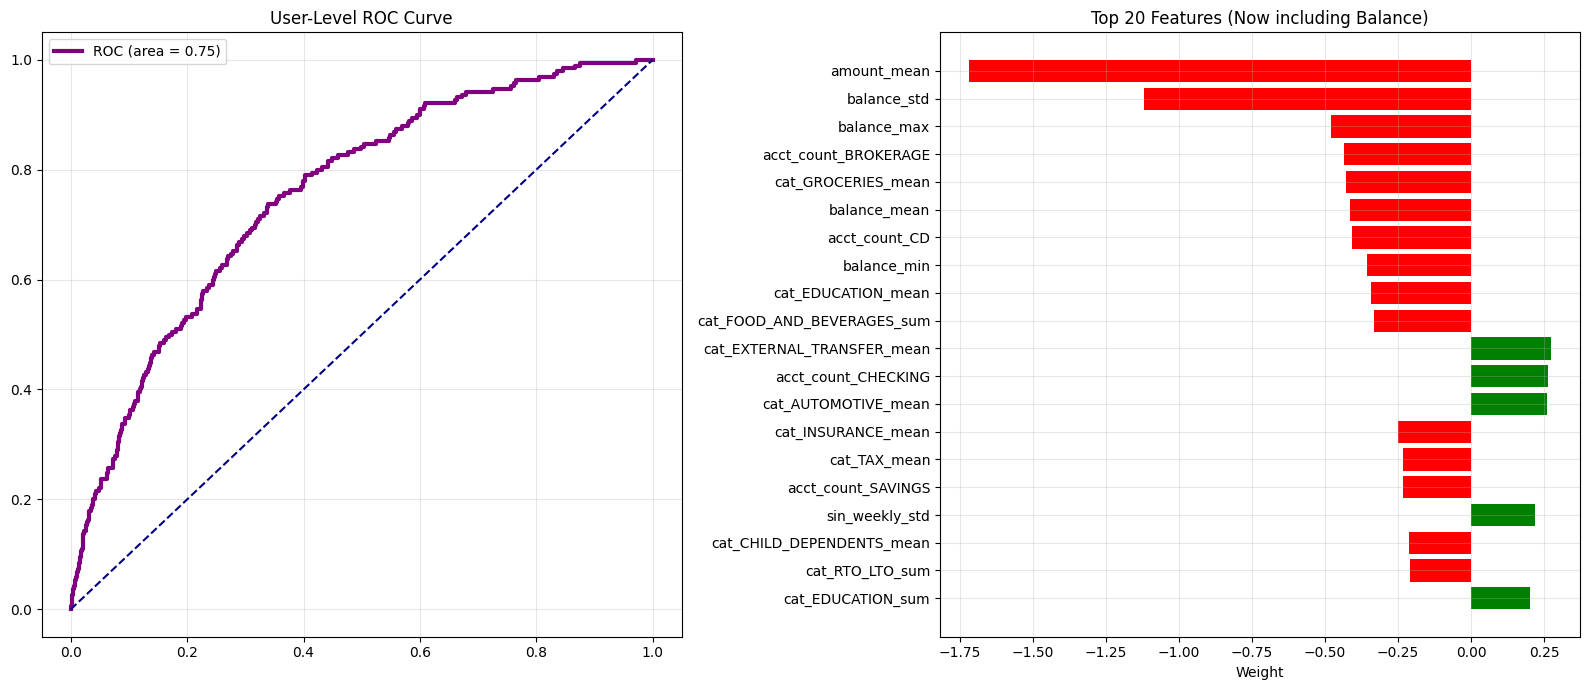

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# ==========================================
# 1. SETUP (Load Transaction Data)
# ==========================================
labels_df = consDF[['prism_consumer_id', 'DQ_TARGET']]
df = trxnDF.merge(labels_df, on='prism_consumer_id', how='inner')
df = add_fourier_features(df, 'posted_date')

print(f"Starting Aggregation on {len(df):,} transactions...")

# ==========================================
# 1.5 PROCESS BALANCE DATA (acctDF)
# ==========================================
# We need to collapse acctDF (multiple rows per user) into 1 row per user.

# A. Convert date and ensure numeric balance
acctDF['balance_date'] = pd.to_datetime(acctDF['balance_date'])
acctDF['balance'] = pd.to_numeric(acctDF['balance'], errors='coerce').fillna(0)

# B. Define Aggregations for Balance
# We want to know their total liquidity across ALL accounts on any given day.
# First, group by User + Date to get "Total Daily Balance" (summing Checking + Savings)
daily_balance = acctDF.groupby(['prism_consumer_id', 'balance_date'])['balance'].sum().reset_index()

# Now aggregate those daily totals into User-Level stats
balance_features = daily_balance.groupby('prism_consumer_id')['balance'].agg([
    'mean',   # avg_daily_balance
    'std',    # balance_volatility
    'min',    # min_balance (Liquidity crunch point)
    'max'     # max_balance
]).add_prefix('balance_') # Renames to balance_mean, balance_std, etc.

# C. Optional: Extract Account Type counts (e.g., "Do they have a Savings account?")
# Pivot to get count of account types per user
acct_types = acctDF.pivot_table(index='prism_consumer_id', columns='account_type', values='prism_account_id', aggfunc='count', fill_value=0)
acct_types = acct_types.add_prefix('acct_count_') # Renames to acct_count_CHECKING, etc.

# Merge Balance Features + Account Types
user_balance_profile = pd.concat([balance_features, acct_types], axis=1).fillna(0)

print(f"Balance Features Ready for {len(user_balance_profile)} users.")

# ==========================================
# 2. CREATE USER PROFILES (AGGREGATION - TRXN DATA)
# ==========================================

# A. One-Hot Encode Categories
cat_dummies = pd.get_dummies(df['category_name'], prefix='cat')
df_encoded = pd.concat([df, cat_dummies], axis=1)

# B. Define Aggregation Dictionary
agg_dict = {
    'amount': ['mean', 'std', 'sum', 'count'],
    'sin_weekly': ['mean', 'std'],
    'cos_weekly': ['mean', 'std'],
    'sin_monthly': ['mean', 'std'],
    'cos_monthly': ['mean', 'std']
}

for col in cat_dummies.columns:
    agg_dict[col] = ['sum', 'mean']

# C. Perform the GroupBy
print("Grouping Transactions by User...")
df_user = df_encoded.groupby('prism_consumer_id').agg(agg_dict)
df_user.columns = [f"{col[0]}_{col[1]}" for col in df_user.columns]
df_user.reset_index(inplace=True)

# ==========================================
# 2.5 MERGE EVERYTHING TOGETHER
# ==========================================
# Merge Transaction Profile + Balance Profile
# We use 'left' merge to keep all transaction users, filling missing balance data with 0
df_final = df_user.merge(user_balance_profile, on='prism_consumer_id', how='left').fillna(0)

# Re-attach Target
user_target_map = df[['prism_consumer_id', 'DQ_TARGET']].drop_duplicates().set_index('prism_consumer_id')
df_final['target'] = df_final['prism_consumer_id'].map(user_target_map['DQ_TARGET'])

print(f"Final User Profile Shape: {df_final.shape}")

# ==========================================
# 3. TRAIN USER-LEVEL MODEL
# ==========================================
X = df_final.drop(['prism_consumer_id', 'target'], axis=1)
y = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, 
                                      max_iter=2000, 
                                      class_weight='balanced',
                                      solver='saga'))
])

print("Training User-Level Model with Balance Features...")
clf.fit(X_train, y_train)

# ==========================================
# 4. EVALUATE & VISUALIZE
# ==========================================
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\n>>> USER-LEVEL ROC AUC SCORE: {roc_auc:.4f} <<<")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
axes[0].plot(fpr, tpr, color='purple', lw=3, label=f'ROC (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0].set_title('User-Level ROC Curve')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Feature Importance
coeffs = clf.named_steps['classifier'].coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeffs})
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coef', ascending=True).tail(20)

colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
axes[1].barh(top_features['Feature'], top_features['Coefficient'], color=colors)
axes[1].set_title('Top 20 Features (Now including Balance)')
axes[1].set_xlabel('Weight')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()